In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from collections import Counter
from scipy.sparse import vstack

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sruji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sruji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sruji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [25]:
df = pd.read_csv('sms+spam+collection/SMSSpamCollection', sep='\t', header=None, names = ['spam','mail'])

In [26]:
df.head()

,spam,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['spam'].value_counts()

spam
ham     4825
spam     750
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='spam'>

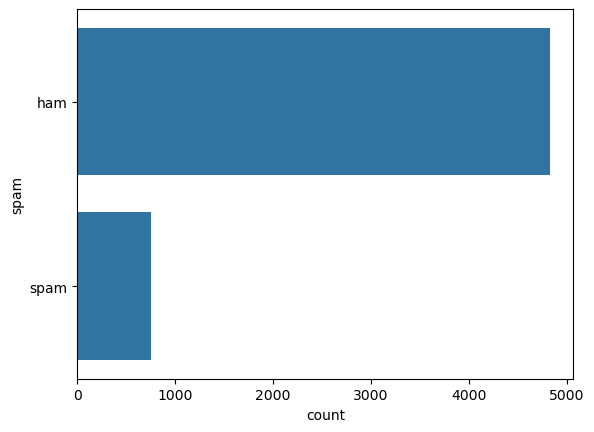

In [28]:
sns.countplot(df['spam'])

In [29]:
le = LabelEncoder()

In [30]:
df['spam'] = le.fit_transform(df['spam'])

In [31]:
df.head()

,spam,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [33]:
X = df['mail']
y = df['spam']

In [34]:
stop_words = set(stopwords.words('english'))

In [35]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
def clear_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    tokens = word_tokenize(text)
    filtered = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ''.join(filtered)

In [38]:
X = X.apply(clear_text)

In [39]:
X.shape

(5575,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(4460,)

In [42]:
vectorizer = TfidfVectorizer(max_features=5000)

In [43]:
X_train_idf = vectorizer.fit_transform(X_train)
X_test_idf = vectorizer.transform(X_test)

In [44]:
X_train_idf.shape

(4460, 4386)

In [45]:
smote = SMOTE()

In [46]:
X_resampled, y_resampled = smote.fit_resample(X_train_idf, y_train)

In [47]:
Counter(y_resampled)

Counter({1: 3877, 0: 3877})

In [57]:
param_grid = {
    'learning_rate':[0.1,0.4],
    'n_estimators':[500,1000],
    'max_depth':[7,10],
    'min_samples_split':[2,3],
    'subsample':[0.8],
    'reg_alpha':[0.1,0.2],
    'reg_lambda':[0.1,0.2],
    'gamma':[1]
}

In [58]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

In [59]:
gcv = GridSearchCV(model, param_grid, scoring='precision', cv=5, n_jobs=-1)

In [60]:
gcv.fit(X_resampled, y_resampled)

C:\Users\sruji\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\sruji\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:01:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [1], 'learning_rate': [0.1, 0.4],
                         'max_depth': [7, 10], 'min_samples_split': [2, 3],
                         'n_estimators': [500, 1000], 'reg_alpha': [0.1, 0.2],
                         'reg_lambda': [0.1, 0.2], 'subsample': [0.8]},
             scoring='precision')

In [61]:
gcv.best_params_

{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 500,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.8}

In [62]:
best_model = gcv.best_estimator_

In [63]:
y_pred = best_model.predict(X_test_idf)

In [64]:
a_score = accuracy_score(y_test, y_pred)
a_score

0.8663677130044843

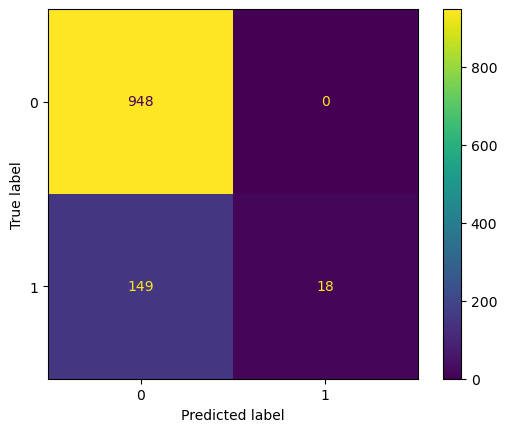

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       948
           1       1.00      0.11      0.19       167

    accuracy                           0.87      1115
   macro avg       0.93      0.55      0.56      1115
weighted avg       0.88      0.87      0.82      1115



In [67]:
p_score = precision_score(y_test, y_pred, pos_label=1)
p_score

1.0

In [68]:
score_df = pd.DataFrame([[p_score, a_score]], columns=['SPAM Precision','Accuracy Score'])

In [69]:
score_df

,SPAM Precision,Accuracy Score
0,1.0,0.866368


In [72]:
def categorize(msg):
    clear_msg = clear_text(msg)
    vector = vectorizer.transform([clear_msg])
    prediction = best_model.predict(vector)
    classify = le.inverse_transform(prediction)
    return classify

In [73]:
msg = 'Free money offer just for you!'

In [44]:
categorize(msg)

array(['ham'], dtype=object)

In [74]:
def mark_as_spam(msg):
    global X_resampled, y_resampled, vectorizer, best_model, le
    clean_msg = clear_text(msg)

    new_vector = vectorizer.transform([clean_msg])

    X_resampled = vstack([X_resampled, new_vector])
    y_resampled = np.append(y_resampled, le.transform(['spam']))

    best_model.fit(X_resampled, y_resampled)

    new_data = pd.DataFrame({
        'label':['spam'],
        'mail':[msg]
    })
    new_data.to_csv('sms+spam+collection/SMSSpamCollection', sep='\t', header=False, index=False, mode='a')
    print('Model Retrained & message added to spam!!!!!')

In [75]:
mark_as_spam(msg)

C:\Users\sruji\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:04:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Retrained & message added to spam!!!!!


In [76]:
X_resampled.shape

(7755, 4386)

In [77]:
y_resampled.shape

(7755,)

In [78]:
df_after_adding = pd.read_csv('sms+spam+collection/SMSSpamCollection', sep='\t', header=None, names = ['spam','mail'])

In [79]:
df_after_adding.tail()

,spam,mail
5571,ham,Rofl. Its true to its name
5572,spam,Limited time offer!!! Get cheap loans approved...
5573,spam,Limited time offer!!! Get cheap loans approved...
5574,spam,Limited time offer!!! Get cheap loans approved...
5575,spam,Free money offer just for you!
